Task 1

In [1]:
# E22CSEU0064
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the color image
image_path = "Lena_Image.png"  # Update the path if needed
original_img = cv2.imread(image_path)

In [3]:
# Convert to YCbCr color space
ycbcr_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2YCrCb)

# JPEG Quantization Tables
luminance_qt = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
], dtype=np.float32)

chrominance_qt = np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
], dtype=np.float32)


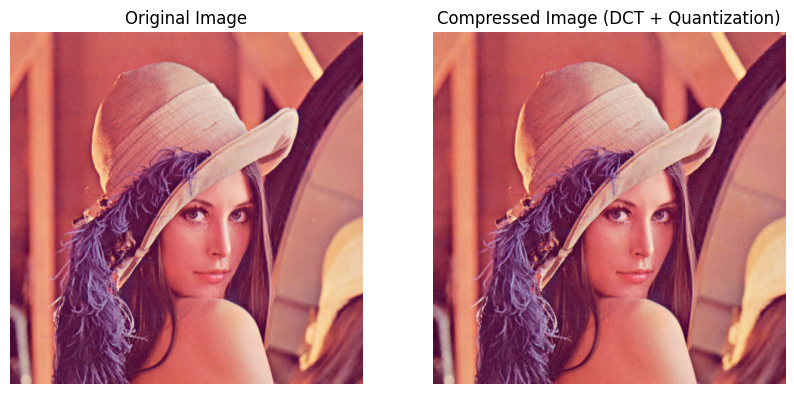

In [4]:
# Function to apply DCT and Quantization to a single channel
def apply_dct_quantization(img_channel, quant_table):
    h, w = img_channel.shape
    compressed_channel = np.zeros((h, w), dtype=np.float32)

    # Process in 8x8 blocks
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = img_channel[i:i+8, j:j+8].astype(np.float32) - 128  # Level shift
            dct_block = cv2.dct(block)  # Apply DCT
            quantized_block = np.round(dct_block / quant_table)  # Quantization
            dequantized_block = quantized_block * quant_table  # Dequantization
            idct_block = cv2.idct(dequantized_block) + 128  # Apply inverse DCT
            compressed_channel[i:i+8, j:j+8] = np.clip(idct_block, 0, 255)  # Clipping

    return compressed_channel.astype(np.uint8)

# Apply DCT & Quantization to Y, Cb, Cr channels
y, cb, cr = cv2.split(ycbcr_img)
y_compressed = apply_dct_quantization(y, luminance_qt)
cb_compressed = apply_dct_quantization(cb, chrominance_qt)
cr_compressed = apply_dct_quantization(cr, chrominance_qt)

# Merge channels back
compressed_ycbcr = cv2.merge([y_compressed, cb_compressed, cr_compressed])

# Convert back to BGR
compressed_img = cv2.cvtColor(compressed_ycbcr, cv2.COLOR_YCrCb2BGR)

# Display the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
plt.title("Compressed Image (DCT + Quantization)")
plt.axis("off")

plt.show()

Task 2

In [ ]:
#Loading Libraries
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from PIL import Image
import io
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification report


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8837 - loss: 0.3675 - val_accuracy: 0.9844 - val_loss: 0.0484
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0477 - val_accuracy: 0.9889 - val_loss: 0.0350
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9905 - val_loss: 0.0289
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9900 - val_loss: 0.0279
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9907 - val_loss: 0.0279
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9954 - loss: 0.0144 - val_accuracy: 0.9917 - val_loss: 0.0282
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9926 - val_loss: 0.0255
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      1.00      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1129    0    0    0    0    6    0    0    0]
 [   2    0 1025    1    0    0    2    2    0    0]
 [   0    0    0 1004    0    3    0    0    3    0]
 [   0    

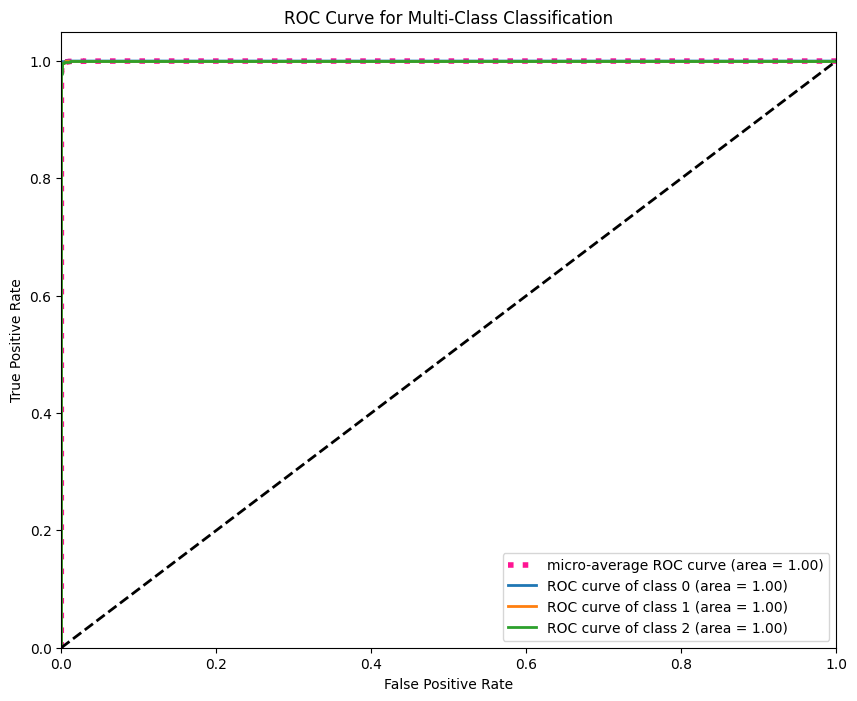

Class 0: AUC = 1.00
Class 1: AUC = 1.00
Class 2: AUC = 1.00
Class 3: AUC = 1.00
Class 4: AUC = 1.00
Class 5: AUC = 1.00
Class 6: AUC = 1.00
Class 7: AUC = 1.00
Class 8: AUC = 1.00
Class 9: AUC = 1.00
Micro-average AUC: 1.00


In [ ]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Get model probabilities
y_score = model.predict(x_test)

# Binarize true labels (assumes classes 0-9; adjust n_classes if needed)
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC for individual classes (optional: here, classes 0, 1, 2 are shown)
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

# Print AUC for all classes
for i in range(n_classes):
    print("Class {}: AUC = {:.2f}".format(i, roc_auc[i]))
print("Micro-average AUC: {:.2f}".format(roc_auc["micro"]))

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3476 - loss: 1.7622 - val_accuracy: 0.5353 - val_loss: 1.2957
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5792 - loss: 1.1910 - val_accuracy: 0.6120 - val_loss: 1.0945
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6457 - loss: 1.0118 - val_accuracy: 0.6628 - val_loss: 0.9644
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6922 - loss: 0.8830 - val_accuracy: 0.6697 - val_loss: 0.9544
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7166 - loss: 0.8131 - val_accuracy: 0.7033 - val_loss: 0.8492
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7434 - loss: 0.7379 - val_accuracy: 0.6887 - val_loss: 0.8984
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7649 - loss: 0.6668 - val_accuracy: 0.6919 - val_loss: 0.8904
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7840 - loss: 0.6172 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.81      0.87      0.84      1000
           2       0.71      0.56      0.63      1000
           3       0.56      0.55      0.55      1000
           4       0.63      0.74      0.68      1000
           5       0.61      0.64      0.62      1000
           6       0.85      0.75      0.80      1000
           7       0.74      0.79      0.76      1000
           8       0.81      0.84      0.83      1000
           9       0.84      0.76      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
 [[769  22  32  20  34   9   5  12  76  21]
 [ 23 868   7   6   5   3   6   5  24  53]
 [ 73  13 561  71 106  71  36  45  21   3]
 [ 20  12  45 547  87 181  38  36  15  19]
 [ 15   7

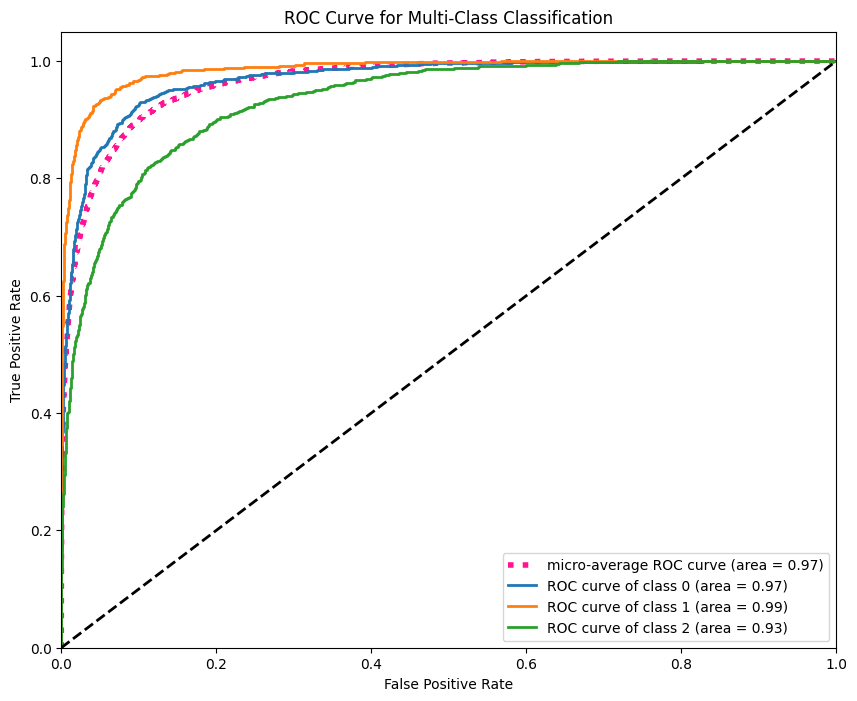

Class 0: AUC = 0.97
Class 1: AUC = 0.99
Class 2: AUC = 0.93
Class 3: AUC = 0.92
Class 4: AUC = 0.96
Class 5: AUC = 0.95
Class 6: AUC = 0.98
Class 7: AUC = 0.97
Class 8: AUC = 0.98
Class 9: AUC = 0.98
Micro-average AUC: 0.97


In [ ]:
# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Get model probabilities
y_score = model.predict(x_test)

# Binarize true labels (assumes classes 0-9; adjust n_classes if needed)
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC for individual classes (optional: here, classes 0, 1, 2 are shown)
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

# Print AUC for all classes
for i in range(n_classes):
    print("Class {}: AUC = {:.2f}".format(i, roc_auc[i]))
print("Micro-average AUC: {:.2f}".format(roc_auc["micro"]))